# **COVID-19 Classification and Analysis**

# **Import Required Libraries**

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)


# **Data Loading & Overview**

In [81]:
df = pd.read_csv("/content/Covid Data.csv")

In [82]:
pd.set_option('display.max_columns', None)

In [83]:
df.shape

(1048575, 21)

In [84]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [85]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [86]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97


In [87]:
df.dtypes

,0
USMER,int64
MEDICAL_UNIT,int64
SEX,int64
PATIENT_TYPE,int64
DATE_DIED,object
INTUBED,int64
PNEUMONIA,int64
AGE,int64
PREGNANT,int64
DIABETES,int64


In [88]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [89]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [91]:
df.duplicated(keep="first").sum()

np.int64(812049)

In [92]:
df[df.duplicated()]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,2,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,2,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,2,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,2,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,2,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97


In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.shape

(236526, 21)

# **Data Exploration**

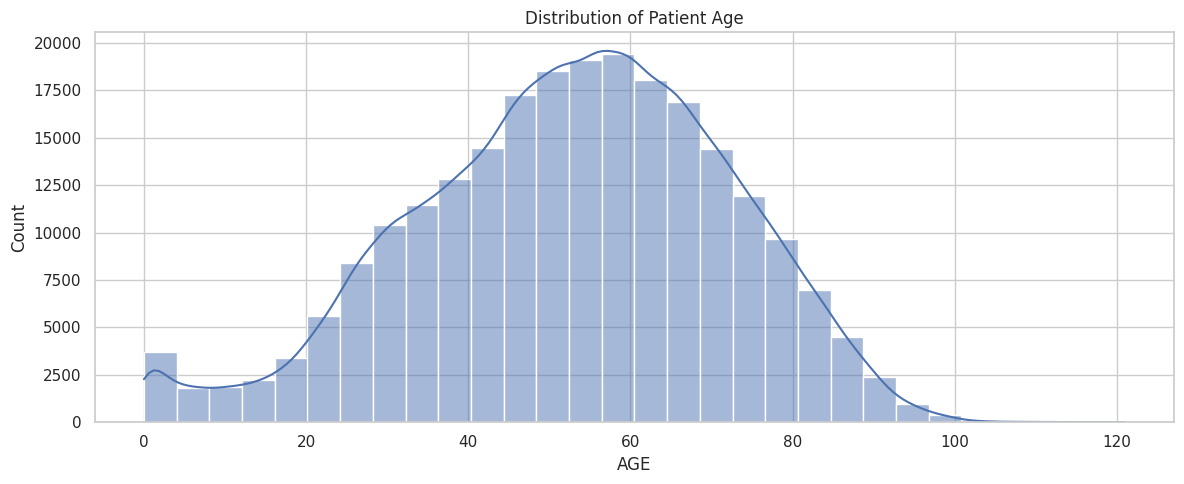

In [97]:
plt.figure(figsize=(12,5))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribution of Patient Age')
plt.tight_layout()
plt.show()

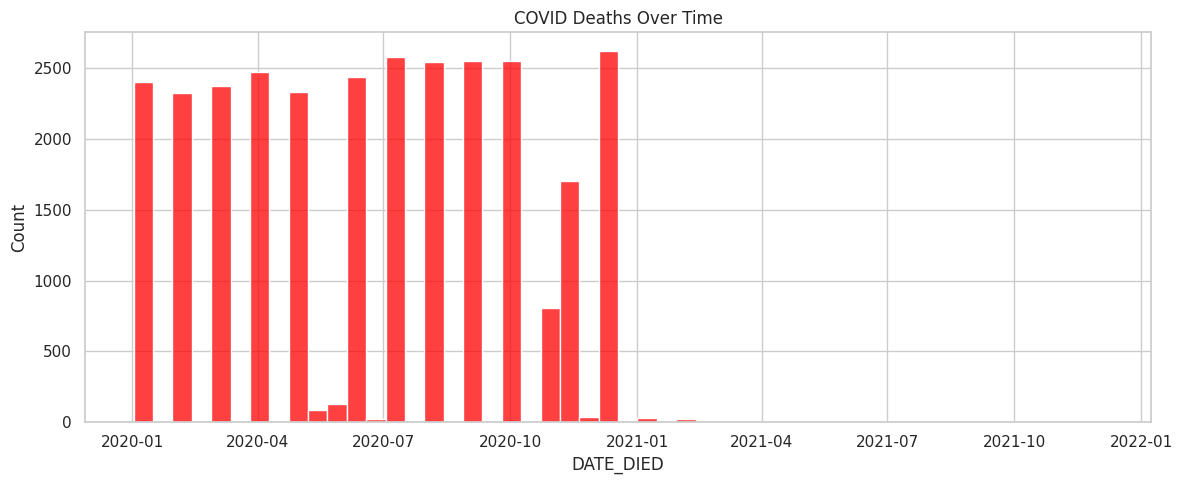

In [98]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
df_dead = df[df['DATE_DIED'].notna()]

plt.figure(figsize=(12,5))
sns.histplot(df_dead['DATE_DIED'], bins=50, color='red')
plt.title('COVID Deaths Over Time')
plt.tight_layout()
plt.show()

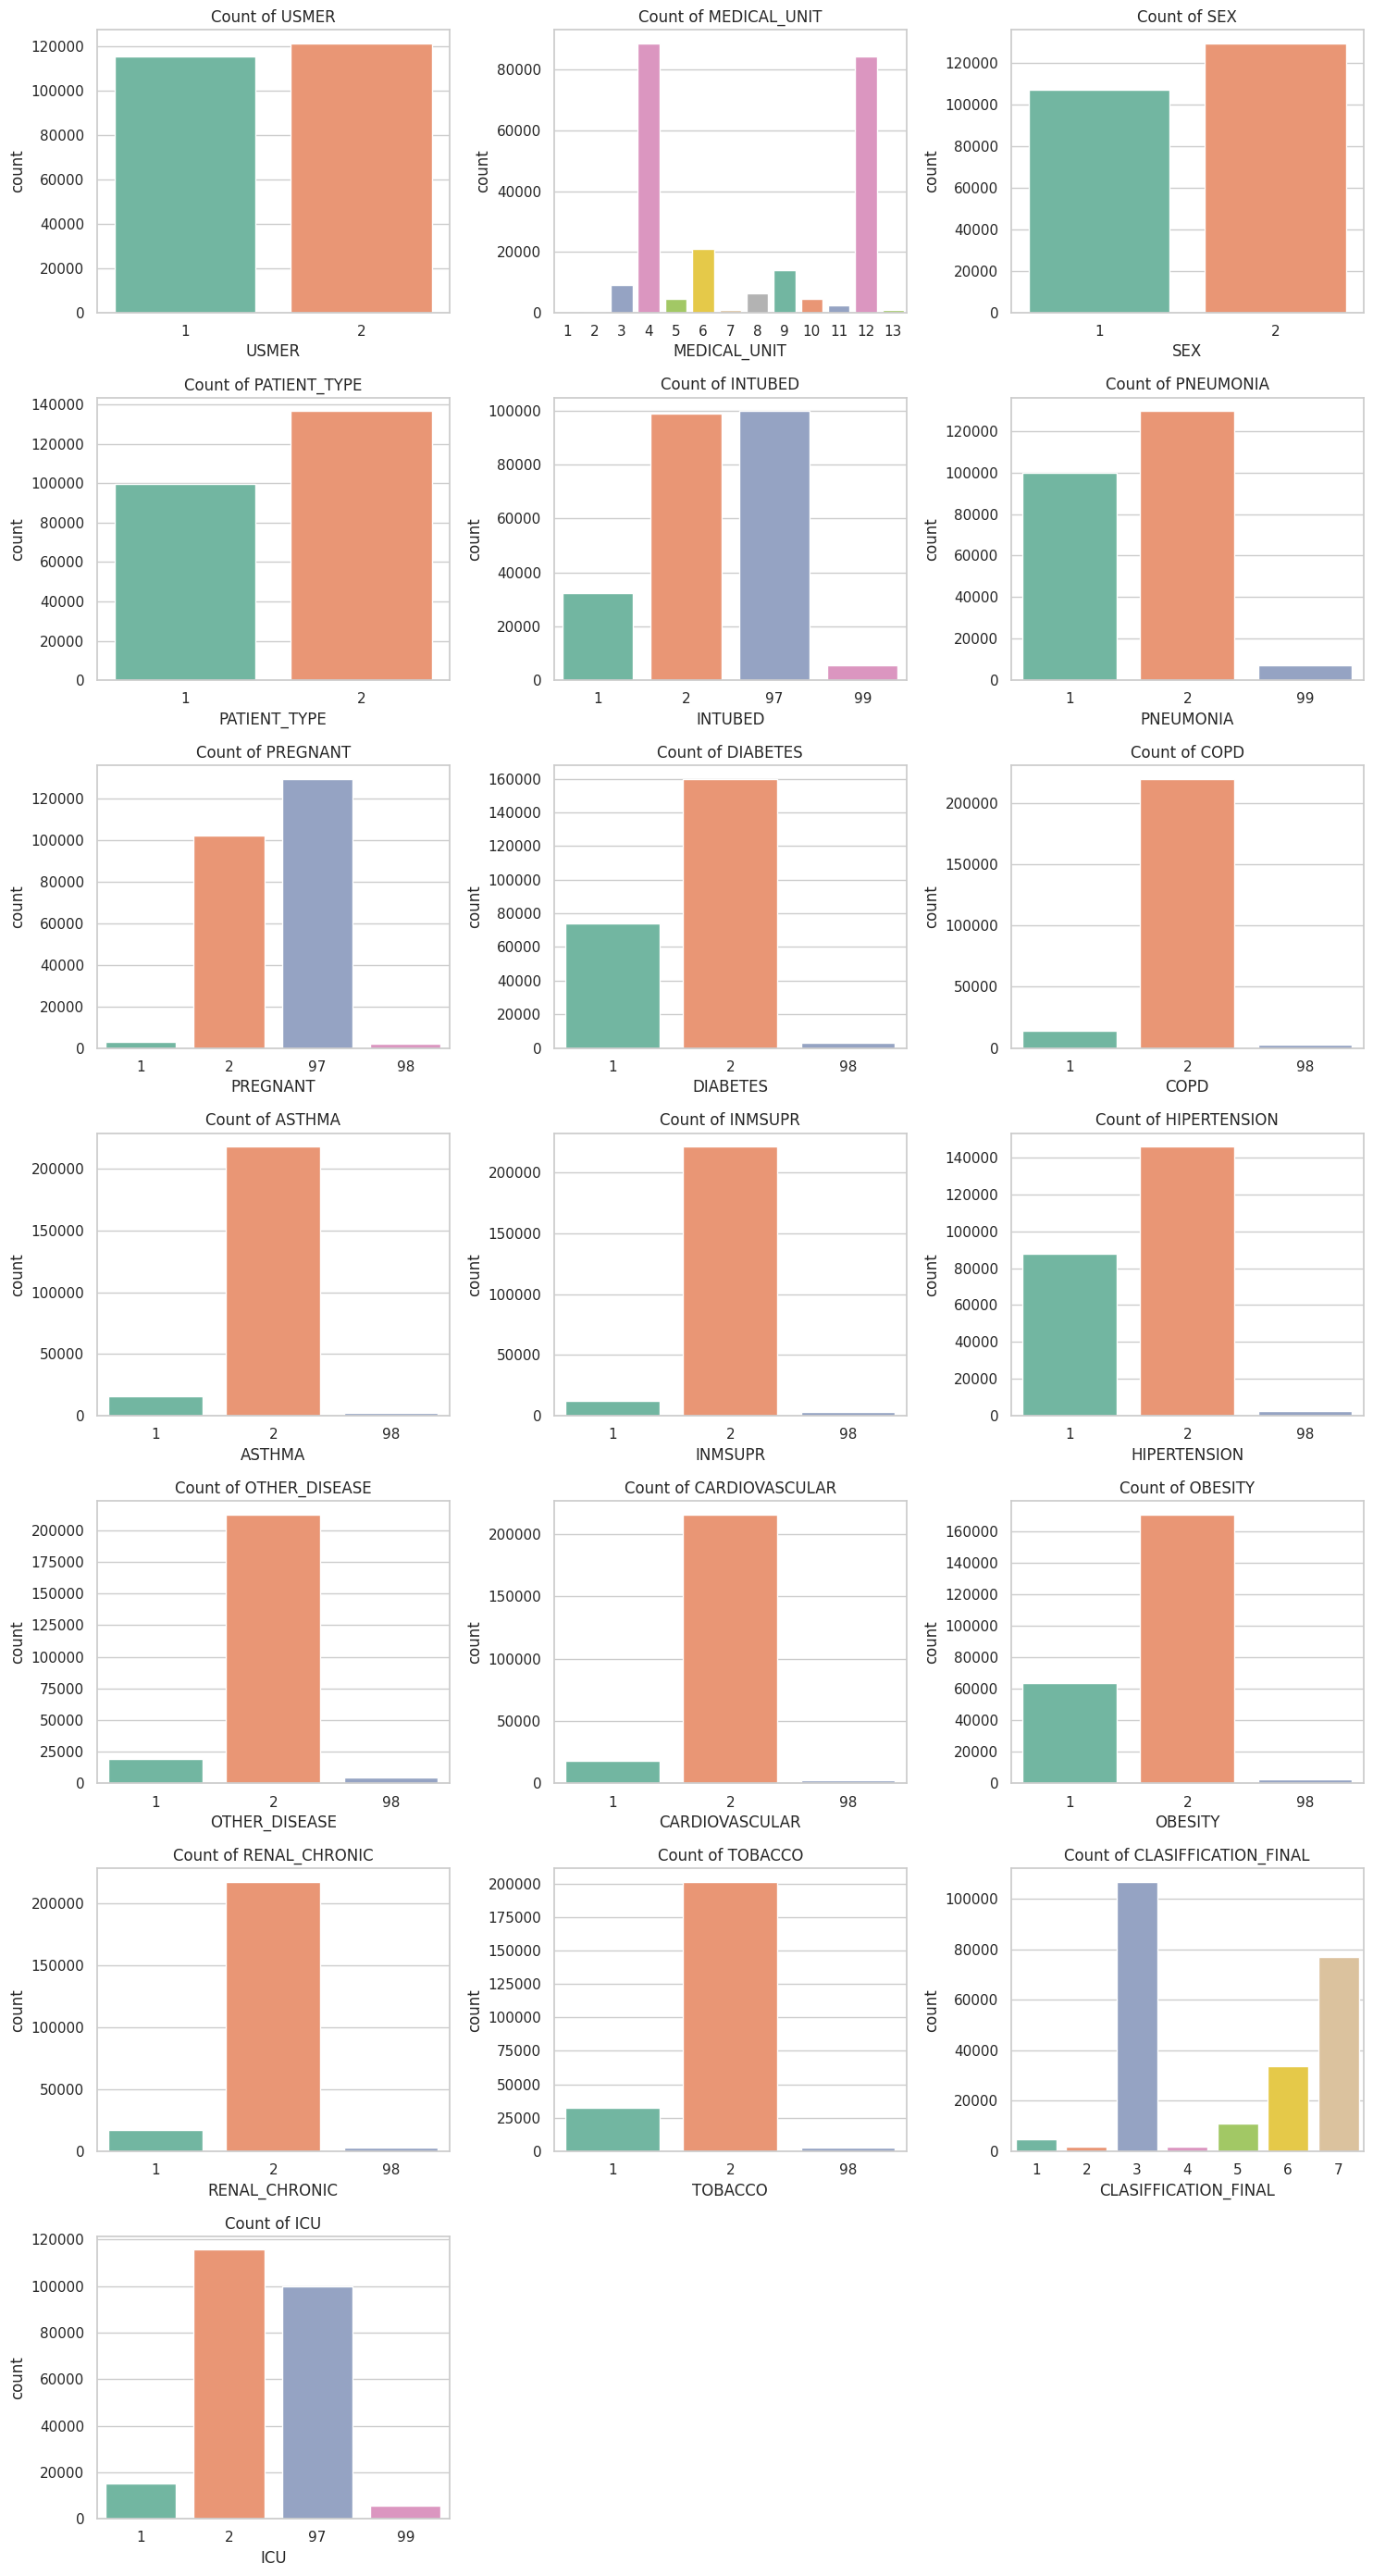

In [99]:
cat_cols = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED',
    'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
    'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
    'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'
]

sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# **Data Cleaning**

*   In these feature that print how many outlier values like 97 98 99 exist n their percentage of total rows
*   Some AGE values unrealistic (e.g., much higher than 100) so we limited AGE between 0 and 100
*   'INTUBED' and 'ICU' had around 44% outlier values like 97, 98, 99. Dropping them would cause significant data loss so we replaced outliers with mode value
*   For columns like PNEUMONIA, DIABETES, COPD, etc., dropping rows with outlier values 97, 98, 99 was better approach than capping as their outlier percentage was low and dropping avoided introducing bias.




In [100]:
featuresToCheck = ['INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
                   'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
                   'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']

outlierValues = [97, 98, 99]

totalRows = len(df)

for col in featuresToCheck:
    outliers = df[df[col].isin(outlierValues)]
    percent = (len(outliers) / totalRows) * 100
    print(f"{col}: {len(outliers)} rows ({percent:.2f}%)")

INTUBED: 105387 rows (44.56%)
PNEUMONIA: 7187 rows (3.04%)
PREGNANT: 131457 rows (55.58%)
DIABETES: 2840 rows (1.20%)
COPD: 2529 rows (1.07%)
ASTHMA: 2506 rows (1.06%)
INMSUPR: 2926 rows (1.24%)
HIPERTENSION: 2620 rows (1.11%)
OTHER_DISEASE: 4362 rows (1.84%)
CARDIOVASCULAR: 2603 rows (1.10%)
OBESITY: 2554 rows (1.08%)
RENAL_CHRONIC: 2531 rows (1.07%)
TOBACCO: 2738 rows (1.16%)
ICU: 105536 rows (44.62%)


In [101]:
df = df[(df['AGE'] >= 0) & (df['AGE'] <= 100)]

In [102]:
for col in ['INTUBED', 'ICU']:
    modeVal = df[col][df[col].isin([1, 2])].mode()[0]
    df[col] = df[col].replace([97, 98, 99], modeVal)

In [103]:
outlierValues = [97, 98, 99]
otherCols = [
    'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
    'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
    'RENAL_CHRONIC', 'TOBACCO'
]

for col in otherCols:
    df = df[~df[col].isin(outlierValues)]

df.reset_index(drop=True, inplace=True)

# **Target Variable Creation**

* Classification values 1, 2, and 3 indicate confirmed COVID-19 so they were grouped as 1 (positive), and others as 0 (negative) to create binary target variable

In [104]:
df['COVID_RESULT'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

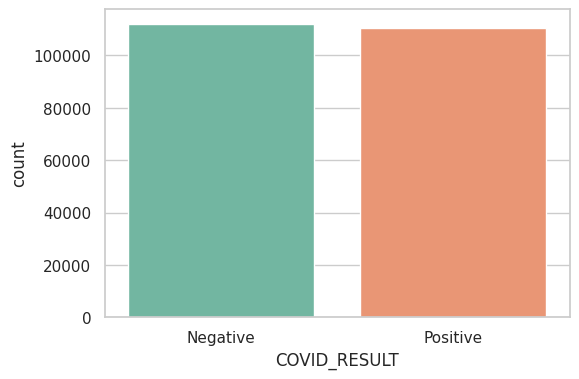

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='COVID_RESULT', data=df, palette='Set2')

plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

* 'DATE_DIED' was dropped because it’s not useful for prediction and leaks target info 'CLASIFFICATION_FINAL' was dropped coz we already extracted 'COVID_RESULT' from it
* PREGNANT column had 55.58% unknown values and less than 1% positive cases, making it unreliable. Replacing with mode wasn’t meaningful so feature was dropped



In [106]:
df.drop(columns=['DATE_DIED', 'PREGNANT', 'CLASIFFICATION_FINAL'], inplace=True)

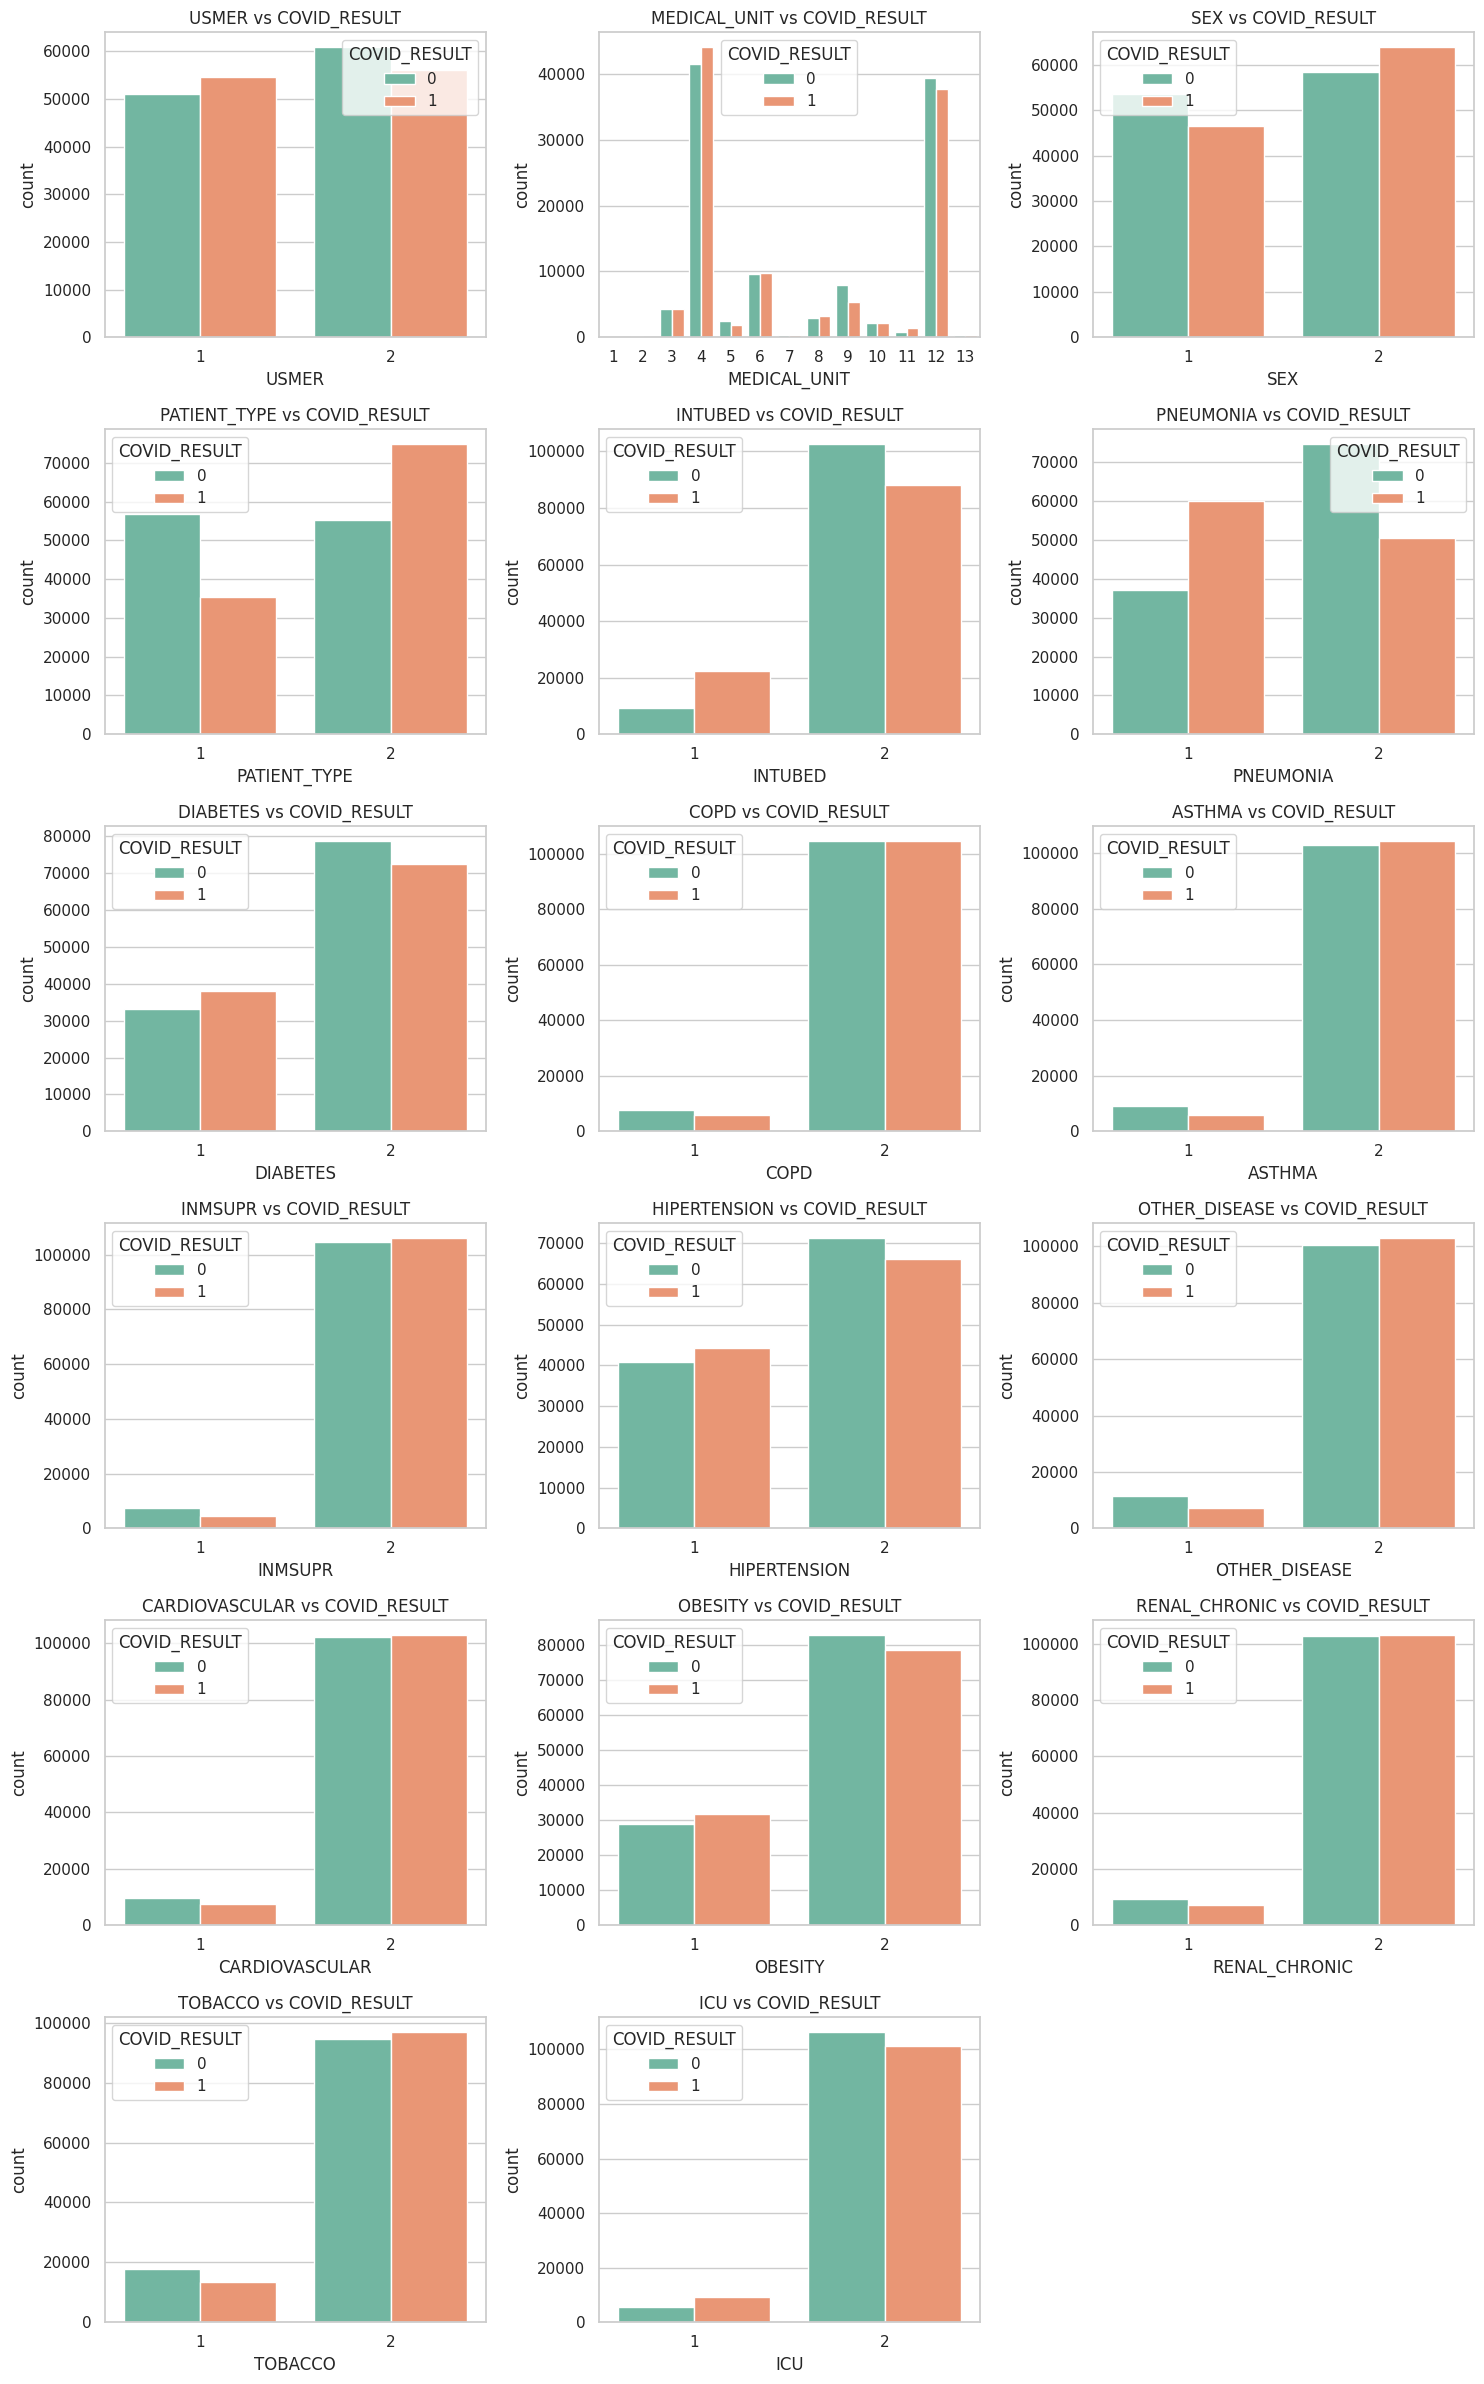

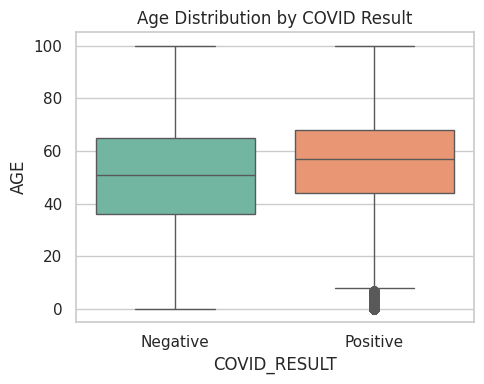

In [107]:
categoricalCols = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU'
]

sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(categoricalCols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(categoricalCols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='COVID_RESULT', palette='Set2')
    plt.title(f'{col} vs COVID_RESULT')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='COVID_RESULT', y='AGE', palette='Set2')
plt.title("Age Distribution by COVID Result")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.tight_layout()
plt.show()



In [108]:
df.shape

(222552, 19)

In [109]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,COVID_RESULT
0,2,1,1,1,2,1,65,2,2,2,2,1,2,2,2,2,2,2,1
1,2,1,2,1,2,1,72,2,2,2,2,1,2,2,1,1,2,2,0
2,2,1,2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,2,1
3,2,1,1,1,2,2,53,2,2,2,2,2,2,2,2,2,2,2,0
4,2,1,2,1,2,2,68,1,2,2,2,1,2,2,2,2,2,2,1


# **Feature Encoding**

* To maintain binary consistency (Yes=1, No=0) across features after handling outliers like 97/98/99 we replaced remaining 2 with 0 for clean modeling
*   I apply pd dummies on MEDICAL_UNIT column to convert its categorical numeric values into binary features making them suitable for machine learning models

In [110]:
colsToMap = ['USMER', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'DIABETES',
             'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
             'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU',]

for col in colsToMap:
    df[col] = df[col].replace({2: 0})


In [111]:
df = pd.get_dummies(df, columns=['MEDICAL_UNIT'], prefix='MED', dtype=int)


In [112]:
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU', 'COVID_RESULT', 'MED_1', 'MED_2', 'MED_3', 'MED_4',
       'MED_5', 'MED_6', 'MED_7', 'MED_8', 'MED_9', 'MED_10', 'MED_11',
       'MED_12', 'MED_13'],
      dtype='object')

In [113]:
df.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,COVID_RESULT,MED_1,MED_2,MED_3,MED_4,MED_5,MED_6,MED_7,MED_8,MED_9,MED_10,MED_11,MED_12,MED_13
0,0,1,1,0,1,65,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,72,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,68,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
dfSampled = df.sample(n=10000, random_state=42)

# **Modeling & Evaluation**

* At the end of the class, Sir Misbah suggested applying K-Fold SVM only on the training data after the train-test split to check accuracy, while Sir Sabih had earlier recommended trying it on the entire dataset. I tried both approaches and found no significant difference in results
* This approach ensures a clean test set for final evaluation, while K-Fold CV on the training set helps assess model stability and tuning without leaking information from the test data.



In [115]:
X = dfSampled.drop(columns=['COVID_RESULT'])
y = dfSampled['COVID_RESULT']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [117]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), ('svm', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Accuracy Scores: [0.60875  0.583125 0.590625 0.62     0.59125 ]
Mean Accuracy: 0.59875


In [118]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [119]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[572 425]
 [321 682]]


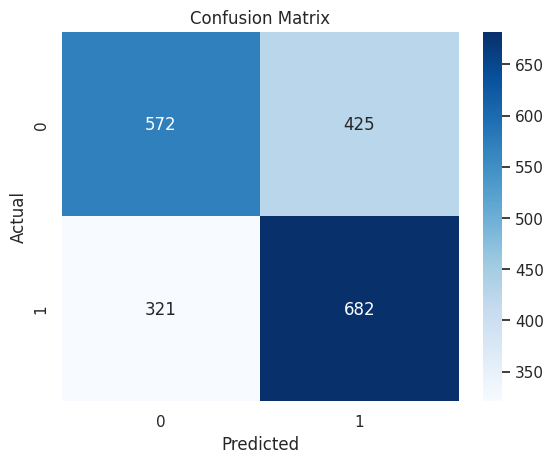

In [120]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [121]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.57      0.61       997
           1       0.62      0.68      0.65      1003

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



# **Final Conclusion**

This project successfully built a COVID-19 patient classification model using cleaned and encoded medical data. Through systematic data preprocessing—including outlier handling, categorical encoding, and thoughtful feature selection—we prepared the data for robust analysis.

By applying Train-Test Split and performing K-Fold Cross-Validation on the training set, we ensured fair model evaluation and avoided data leakage. The SVM classifier with a linear kernel achieved consistent performance, as measured by accuracy, confusion matrix, and classification report.

The model not only demonstrated stability but also highlighted the importance of careful preprocessing in healthcare-related classification problems. Both modeling approaches—on full data and post-split—yielded similar results, confirming the reliability of our training strategy.

This workflow serves as a solid foundation for building predictive models in real-world medical datasets

In [ ]:
# end